<a href="https://colab.research.google.com/github/mukkatharun/DataCleaningAndPreProcessing/blob/main/Data_Preprocessing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Mining 255**

   Name : Tharun Mukka <br />
   SJSU ID : 014640496

**Car Price Prediction Based on Features**
I am choosing a kaggale dataset which has all the car features with price, we would be using this data to create a model that can predict the price by the features we need in a car.

**Table of content**

1.   Connecting to kaggle and download the dataset directly into colab
2.   Data Preprocessing
3.   Data Visualization
4.   Data Model

**Fetching Dataset from kaggle**

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download CooperUnion/cardataset
! unzip cardataset.zip
 

  0% 0.00/103k [00:00<?, ?B/s]
100% 103k/103k [00:00<00:00, 39.2MB/s]
Archive:  cardataset.zip
  inflating: data.csv                


**Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as cov

In [ ]:
data = pd.read_csv('data.csv')
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5



*   First we will remove some columns which are not required for predicting the price of a car, this is a easy process to remove some of the unnecessary data present in the dataset


> As part of our first step we are removing Model, Number of doors, Engine fuel type, Popularity and Market Category columns


In [ ]:
data = data.drop(["Number of Doors", "Market Category", "Vehicle Style", "Model", "Popularity"], axis=1)
data.shape

(11914, 11)

**column renaming and column value grouping and renaming with single value**

In [ ]:
data.rename(
    columns={
        "Engine Fuel Type": "Fuel_Type",
        "Engine HP": "HP",
        "Engine Cylinders": "Cylinders",
        "Transmission Type": "Transmission",
        "Vehicle Size": "Size",
        "highway MPG": "H_MPG",
        "city mpg": "C-MPG",
        "MSRP": "Price"
    }, 
    inplace = True
)
data.head()

,Make,Year,Fuel_Type,HP,Cylinders,Transmission,Driven_Wheels,Size,H_MPG,C-MPG,Price
0,BMW,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,26,19,46135
1,BMW,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,28,19,40650
2,BMW,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,28,20,36350
3,BMW,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,28,18,29450
4,BMW,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,28,18,34500


*   Next step is check for duplicate data and delete them



In [ ]:
# first argument is for finding duplicated records and second arg is for showing all columns
data.loc[data.duplicated(), :]

,Make,Year,Fuel_Type,HP,Cylinders,Transmission,Driven_Wheels,Size,H_MPG,C-MPG,Price
14,BMW,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,28,19,31500
18,Audi,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,Midsize,24,17,2000
20,Audi,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,Midsize,24,17,2000
24,Audi,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,Midsize,24,17,2000
25,Audi,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,Midsize,24,17,2000
...,...,...,...,...,...,...,...,...,...,...,...
11481,Suzuki,1998,regular unleaded,95.0,4.0,MANUAL,four wheel drive,Compact,26,22,2000
11603,Volvo,2017,regular unleaded,302.0,4.0,AUTOMATIC,all wheel drive,Midsize,29,20,46350
11604,Volvo,2017,regular unleaded,240.0,4.0,AUTOMATIC,front wheel drive,Midsize,30,23,40950
11708,Suzuki,2008,regular unleaded,252.0,6.0,AUTOMATIC,all wheel drive,Midsize,22,15,29149


In [ ]:
# keeping the first occurance of data and remove the duplicates
data = data.drop_duplicates(subset=None, keep='first')
data.duplicated(subset=None, keep=False).sum()

0

As we have removed the duplicate in the above step, next thing we can do is checking and handling null values [either removing them or filling them with meaning full data]






**Handling Null Values**


*   First check if any column have more than 50% are null values
*   Then for the other columns if we have fewer null values, choose different, methods to fill them or delete them.




In [ ]:
# this deletes all columns which have more than 50% nulls
data = data.loc[:, data.isin([' ','NULL',0]).mean() < .5]

In [ ]:
data.isna().sum()

Make              0
Year              0
Fuel_Type         3
HP               69
Cylinders        30
Transmission      0
Driven_Wheels     0
Size              0
H_MPG             0
C-MPG             0
Price             0
dtype: int64

In [ ]:
data = data[data['HP'].notna()] # as the null values are very less in number and they are spread among 40+ brands we can remove those

In [ ]:
data.loc[(data['Fuel_Type'] == 'electric') & (data['Cylinders'].isnull())].count()
# here we can see the cylinders columns for electric vehicles are null but we can go ahead and fill them with O as electric vehicles dont contain cylinders

Make             9
Year             9
Fuel_Type        9
HP               9
Cylinders        0
Transmission     9
Driven_Wheels    9
Size             9
H_MPG            9
C-MPG            9
Price            9
dtype: int64



> If we oberserve value of cylinders for electric vehicles, it's 0. so we can go ahead and fill all values with 0 for all null value in electric vehicle type



In [ ]:
data.loc[(data['Fuel_Type'] == 'electric') & (data['Cylinders'].isnull()), 'Cylinders'] = 0
data.isna().sum()

Make              0
Year              0
Fuel_Type         3
HP                0
Cylinders        20
Transmission      0
Driven_Wheels     0
Size              0
H_MPG             0
C-MPG             0
Price             0
dtype: int64

In [ ]:
data = data[data['Cylinders'].notna()] # we can remove these columns as the spread is very high between the brands, 20 nulls in 40+ brands
data = data[data['Fuel_Type'].notna()]
data.isna().sum()

Make             0
Year             0
Fuel_Type        0
HP               0
Cylinders        0
Transmission     0
Driven_Wheels    0
Size             0
H_MPG            0
C-MPG            0
Price            0
dtype: int64



*   AFter seeing the Engine Fuel Type column we could see the possibility of grouping similar types. 



In [ ]:
data["Fuel_Type"] = data["Fuel_Type"].replace({'flex-fuel (unleaded/E85)': 'flex-fuel',
                                  'flex-fuel (premium unleaded recommended/E85)':'flex-fuel', 
                                  'flex-fuel (premium unleaded required/E85)': 'flex-fuel',
                                  'flex-fuel (unleaded/natural gas)': 'flex-fuel',
                                  'premium unleaded (required)': 'Gasoline',
                                  'regular unleaded': 'Gasoline',
                                  'premium unleaded (recommended)': 'Gasoline'
                                  })


**Data Exploration and Pre Processing**

In [ ]:
from collections import Counter
make_list = data['Make'].to_list()
make_map = Counter(make_list)
car_make_count_list = []
for iter, row in data.iterrows():
  car_make_count_list.append(make_map[row['Make']])
data['Make_Frequency']  = car_make_count_list
print(len(set(make_list)))
print(Counter(make_list))


47
Counter({'Chevrolet': 1054, 'Ford': 801, 'Toyota': 712, 'Volkswagen': 567, 'Nissan': 540, 'Dodge': 507, 'GMC': 480, 'Honda': 429, 'Cadillac': 393, 'Mazda': 392, 'Mercedes-Benz': 340, 'Suzuki': 335, 'Infiniti': 326, 'BMW': 324, 'Audi': 320, 'Hyundai': 254, 'Acura': 246, 'Volvo': 240, 'Subaru': 229, 'Kia': 219, 'Mitsubishi': 204, 'Lexus': 201, 'Chrysler': 185, 'Buick': 184, 'Pontiac': 164, 'Lincoln': 152, 'Land Rover': 137, 'Porsche': 134, 'Oldsmobile': 106, 'Saab': 101, 'Aston Martin': 91, 'Bentley': 74, 'Ferrari': 69, 'Plymouth': 61, 'Scion': 60, 'FIAT': 58, 'Maserati': 55, 'Lamborghini': 52, 'Rolls-Royce': 31, 'Lotus': 28, 'HUMMER': 17, 'Maybach': 16, 'Alfa Romeo': 5, 'McLaren': 5, 'Genesis': 3, 'Bugatti': 3, 'Spyker': 2})


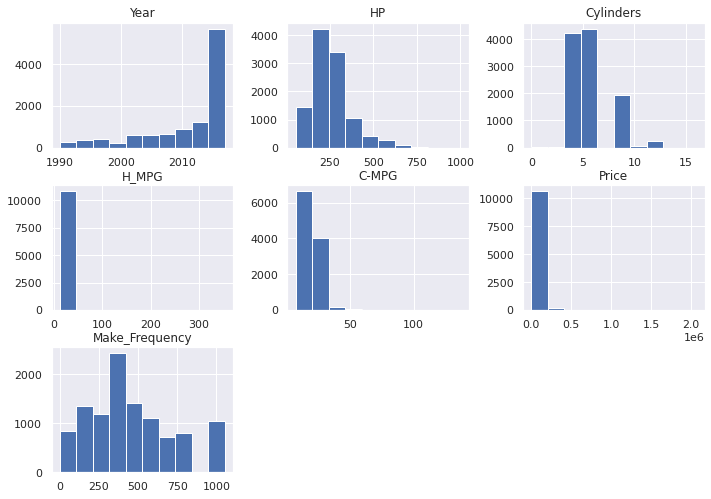

In [ ]:
#Generate histograms for all the columns in the data
data.hist()
plt.show()

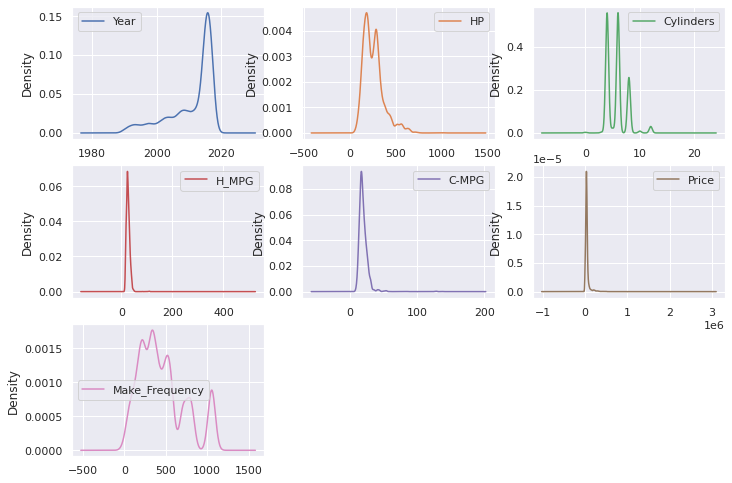

In [ ]:
# Above histograms gives a very good about idea about of these columns, but they are slight visually difficult to draw the lines through them
#This density plot makes it easier to understand the various densities distribution of data and easier to read the data
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

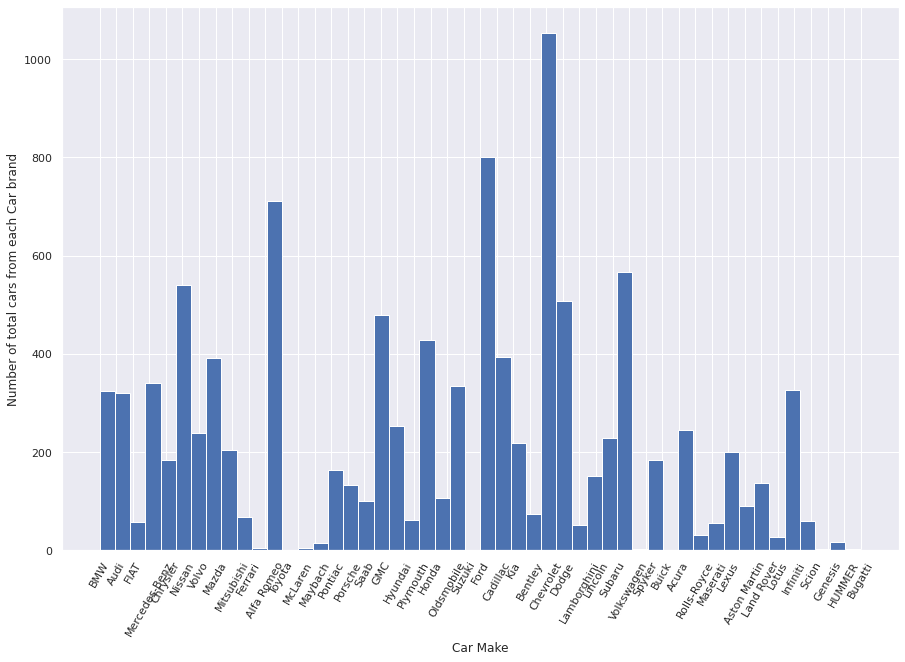

In [ ]:
#Generated a histogram for the each Car brand type 
# np.random.seed(42)
# x = np.random.normal(size=1000)
plt.figure(figsize=(15,10))
plt.hist(make_list, density=False, bins=50)  # density=False would make counts
plt.xticks(rotation=60)
plt.ylabel('Number of total cars from each Car brand')
plt.xlabel('Car Make');

In [ ]:
data = data[data.Make_Frequency > 5] # Remove the cars less than 5 data points as it will be difficult to fit
data.shape

(10888, 12)

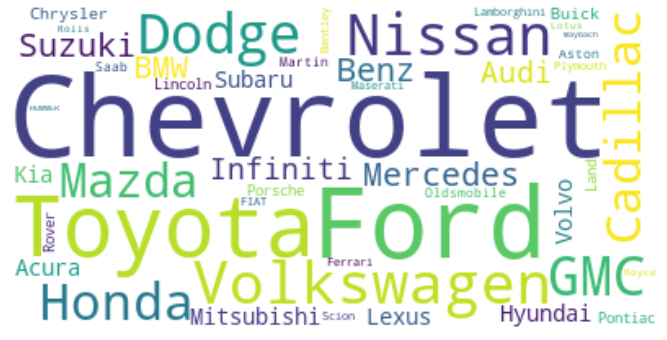

<Figure size 2520x6120 with 0 Axes>

In [ ]:
#Another easy way to visualise the Car brands by its number of sales is using wordcloud. Chevrolet has the highest number of cars sold etc.
from wordcloud import WordCloud
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(' '.join(data['Make'].to_list()))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")

plt.figure(figsize=(35,85))
plt.show()

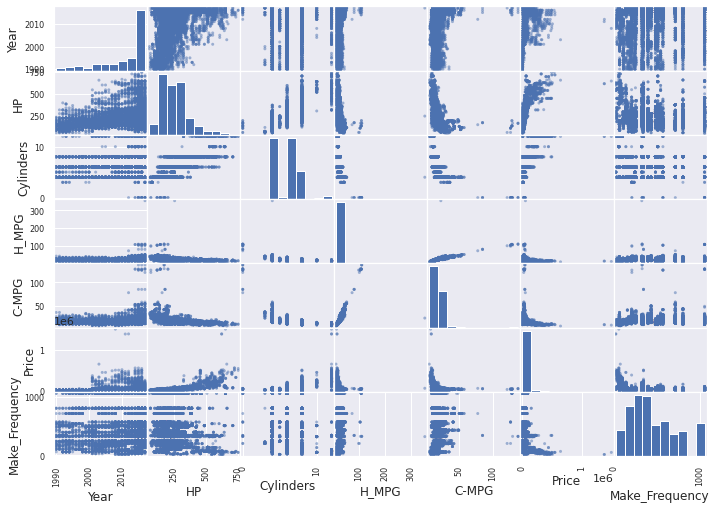

In [ ]:
#Now that I have understand the distribution of data within each columns and remove the unneccesary data
#Next step is to visualise the relationship between two variables and help us identify correlated signals and help us remove them
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.show()
# I can see from graphs that some of the variables are correlated. For example I can see a straight line between C_MPG and H_MPG scatter plot

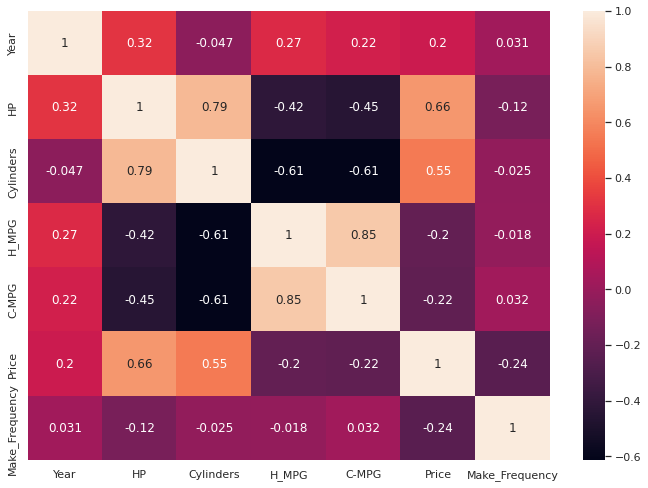

In [ ]:
# lets find out what all features are corelated and that can be knowing using heatmap
sns.set(rc={'figure.figsize':(11.7,8.27)}) 
sns.heatmap(data.corr(), annot=True)




*   As we can see the heatmap above, we can able to find which all features are related to each other and how they are affecting the price of the car
*   We need to clean those columns data properly as we can see they affect the price directly.



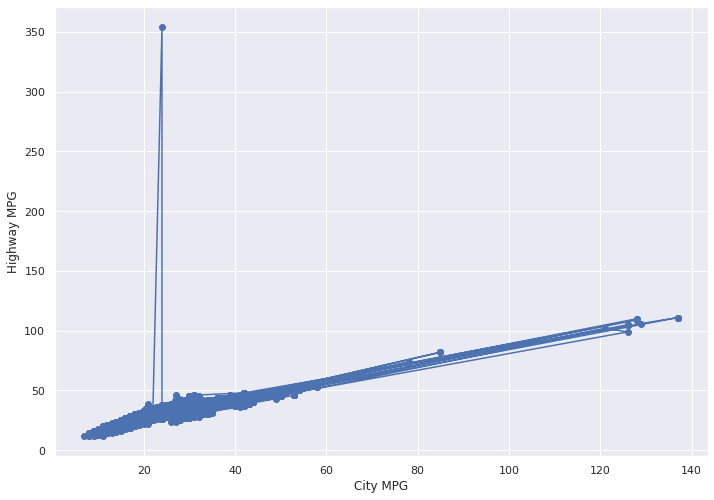

In [ ]:
#Lets take a closer look at the scatter plot of H_MPG vs C_MPG.
#  Interestingly we find a case here where the H_MPG values is 350+ which clearly say its an outlier. It does help to identify outliers in data
c_mpglist , h_mpg_list = data['C-MPG'].to_list(),data['H_MPG'].to_list()
plt.scatter(c_mpglist, h_mpg_list)
plt.plot(c_mpglist, h_mpg_list)

plt.ylabel('Highway MPG')
plt.xlabel('City MPG');plt.show() 
#Here we can see there is an outlier, we can handle it either by removing or substituting mean, median or near good values

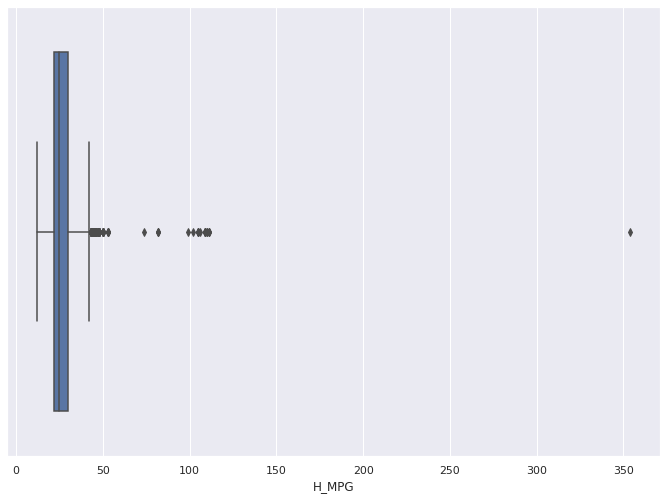

In [ ]:
sns.boxplot(x=data['H_MPG']) # just finding the same outlier using a box plot

**Outlier handling**

In [ ]:
data = data[data['H_MPG'] < 330] # as we had only one outlier, we are just filtering it out

We can remove one of the column from Highway mileage and city mileage, as they both can be correlated and we can find the relation between them and come up with a multiplication factor between both.

In [ ]:
data['H_MPG'].corr(data['C-MPG'])

0.8524498617229572

In [ ]:
data = data.drop(["C-MPG"], axis=1)
data.shape

(10906, 11)

**Changing the categorical values to integers**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
# transform data
onehot_encoder = OneHotEncoder(sparse=False)

X = data[['Make', 'Fuel_Type', 'Transmission',
       'Driven_Wheels', 'Size']]
data_values = X.values
print(X.columns)
X = data_values[:, :-1].astype(str)
X = onehot_encoder.fit_transform(X)
print(len(X), len(X[0]))
print(X[0])

Index(['Make', 'Fuel_Type', 'Transmission', 'Driven_Wheels', 'Size'], dtype='object')
10906 61
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]


In [ ]:
from sklearn.preprocessing import StandardScaler\
data['VH_MPG'] = StandardScaler().fit_transform(data['H_MPG'].values.reshape(-1,1))
data['VHP'] = StandardScaler().fit_transform(data['HP'].values.reshape(-1,1))

data.head()

,Make,Year,Fuel_Type,HP,Cylinders,Transmission,Driven_Wheels,Size,H_MPG,Price,Make_Frequency,VH_MPG,VHP
0,BMW,2011,Gasoline,335.0,6.0,MANUAL,rear wheel drive,Compact,26,46135,324,-0.039742,0.725175
1,BMW,2011,Gasoline,300.0,6.0,MANUAL,rear wheel drive,Compact,28,40650,324,0.215969,0.406979
2,BMW,2011,Gasoline,300.0,6.0,MANUAL,rear wheel drive,Compact,28,36350,324,0.215969,0.406979
3,BMW,2011,Gasoline,230.0,6.0,MANUAL,rear wheel drive,Compact,28,29450,324,0.215969,-0.229413
4,BMW,2011,Gasoline,230.0,6.0,MANUAL,rear wheel drive,Compact,28,34500,324,0.215969,-0.229413


In [ ]:

X = data[['Cylinders', 'HP']]
X = X.fillna(0)
y = data['Price']
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X.values)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Price
0,79.763056,-0.717891,46135.0
1,44.765901,-0.271620,40650.0
2,44.765901,-0.271620,36350.0
3,-25.228408,0.620921,29450.0
4,-25.228408,0.620921,34500.0


In [ ]:
#Explains the variance shown by each prinicipal component. The first component explains about 0.99 percent of the original data variance
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [9.99901344e-01 9.86557291e-05]


**End of document**